# Community Detection

## networkx和community结合

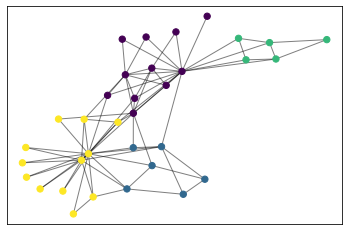

In [16]:
>>> import community as community_louvain
>>> import matplotlib.cm as cm
>>> import matplotlib.pyplot as plt
>>> import networkx as nx
>>> G = nx.karate_club_graph()
>>> # compute the best partition
>>> partition = community_louvain.best_partition(G)

>>> # draw the graph
>>> pos = nx.spring_layout(G)
>>> # color the nodes according to their partition
>>> cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
>>> nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
>>>                        cmap=cmap, node_color=list(partition.values()))
>>> nx.draw_networkx_edges(G, pos, alpha=0.5)
>>> plt.show()

## igraph

In [107]:
import igraph as ig
import scipy.io as sio
import numpy as np
import leidenalg as la
import random
print(ig.__version__)

0.8.3


In [108]:
N = 200
g = ig.Graph.Famous('Zachary')
clusters = la.find_partition(g, la.ModularityVertexPartition)
# plot(clusters)
print("type of ig.Graph")
type(g)
type(clusters)
print(clusters)
print("type of clusters")
type(clusters)

type of ig.Graph


igraph.Graph

leidenalg.VertexPartition.ModularityVertexPartition

Clustering with 34 elements and 4 clusters
[0] 8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33
[1] 0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21
[2] 23, 24, 25, 27, 28, 31
[3] 4, 5, 6, 10, 16
type of clusters


leidenalg.VertexPartition.ModularityVertexPartition

In [109]:
member = clusters.membership
print(member) #得到每个节点属于的社区编号
new_cmap = ['#'+''.join([random.choice('0123456789abcdef') for x in range(6)]) for z in range(len(clusters))]
new_cmap # 随机生成社区颜色

[1, 1, 1, 1, 3, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0]


['#e78ba6', '#30bbef', '#4a7c44', '#ebfb8d']

In [110]:
# enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，
# 一般用在 for 循环当中。
for i, c in enumerate(clusters):
    print(f"({i},{c})")

(0,[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33])
(1,[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21])
(2,[23, 24, 25, 27, 28, 31])
(3,[4, 5, 6, 10, 16])


In [111]:
vcolors = {v: new_cmap[i] for i, c in enumerate(clusters) for v in c} #key为节点标签，value为节点颜色
print(vcolors) # 让每个社区的节点颜色相同

{8: '#e78ba6', 9: '#e78ba6', 14: '#e78ba6', 15: '#e78ba6', 18: '#e78ba6', 20: '#e78ba6', 22: '#e78ba6', 26: '#e78ba6', 29: '#e78ba6', 30: '#e78ba6', 32: '#e78ba6', 33: '#e78ba6', 0: '#30bbef', 1: '#30bbef', 2: '#30bbef', 3: '#30bbef', 7: '#30bbef', 11: '#30bbef', 12: '#30bbef', 13: '#30bbef', 17: '#30bbef', 19: '#30bbef', 21: '#30bbef', 23: '#4a7c44', 24: '#4a7c44', 25: '#4a7c44', 27: '#4a7c44', 28: '#4a7c44', 31: '#4a7c44', 4: '#ebfb8d', 5: '#ebfb8d', 6: '#ebfb8d', 10: '#ebfb8d', 16: '#ebfb8d'}


In [112]:
?g.vs.indices

Type:        list
String form: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Length:      34
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [113]:
type(g.vs.indices)

list

In [114]:
g.vs["color"] = [vcolors[v] for v in g.vs.indices] # 遍历每个节点，得到他们的颜色值

In [115]:
g.es[1].tuple # 得到边集中的(source, target)
type(member) 
member[1] # 得到第一个节点的社区编号
g.es[1].index # 得到边集的序列号
print(g.es.indices) # g.es.indices得到图的边序列号

(0, 2)

list

1

1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


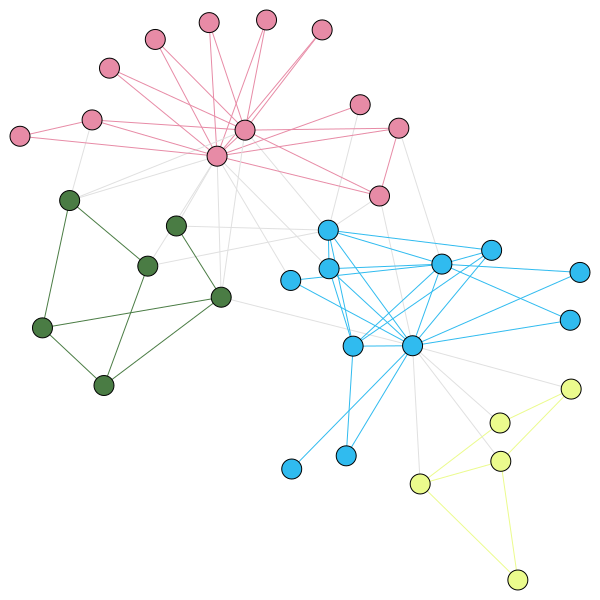

In [125]:
ecolors = {e.index: new_cmap[member[e.tuple[0]]] if member[e.tuple[0]]==member[e.tuple[1]] else "#e0e0e0" for e in g.es}
eweights = {e.index: (3*g.vcount()) if member[e.tuple[0]]==member[e.tuple[1]] else 0.1 for e in g.es}
g.es["weight"] = [eweights[e.index] for e in g.es] # 将边集的权重赋值
g.es["color"] = [ecolors[e] for e in g.es.indices] # 将边集的颜色赋值
# visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"], maxiter=500, area=N ** 3, repulserad=N ** 3)
ig.plot(g, make_groups = True)

In [145]:
g3 = ig.Graph.Famous('Zachary')
clusters3 = la.find_partition(g3,la.ModularityVertexPartition)

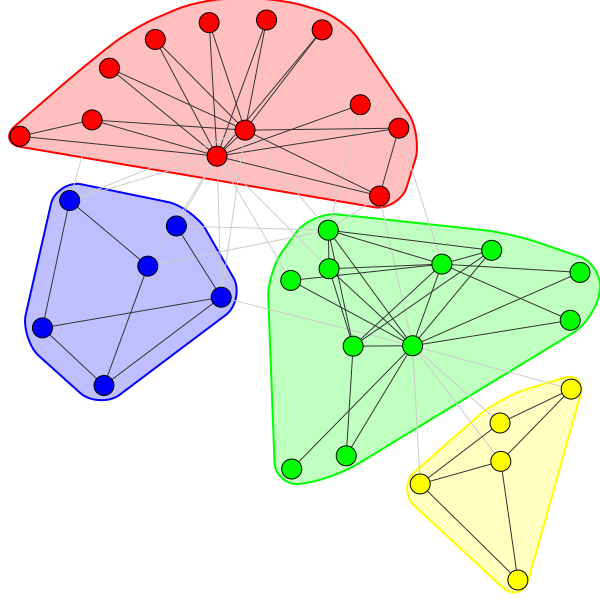

In [144]:
ig.plot(clusters3, mark_groups = True)